# task1

主要参考：https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

## 尝试对未增加tabel7天气信息的特征表格进行学习

In [35]:
# coding:utf-8
import pandas as pd
import numpy as np
# train = pd.read_csv('..\..\\data_pre\\table3456_train_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
# test = pd.read_csv('..\..\\data_pre\\table3456_test_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
train = pd.read_csv('..\..\\data_pre\\table34567_train_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
test = pd.read_csv('..\..\\data_pre\\table34567_test_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])

In [36]:
print train.shape, test.shape

(25648, 56) (504, 56)


In [37]:
X_train = train.drop('avg_travel_time',axis=1).values
X_test = test.drop('avg_travel_time',axis=1).values
y = train.avg_travel_time.values

In [38]:
del test,train

In [39]:
# 尝试基本的线性回归及正则化线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.utils import check_array
# 定义评分函数
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))
score = make_scorer(MAPE, greater_is_better=False)

LR = LinearRegression()
# Sklearn 计算模型的负均方误差，所以我们需要先取负再开根号得到我们的参数均方根误差
# cv = 5 会将数据分成大小相似的10份，轮流用9份用来训练，１份用来评估计算得分，会得到10个得分
test_score = cross_val_score(LR, X_train, y, cv=10, scoring=score)
print(test_score)

[-0.26767211 -0.26139597 -0.25970186 -0.34983964 -0.29898495 -0.22010344
 -0.21219085 -0.25106534 -0.25217831 -0.24337574]


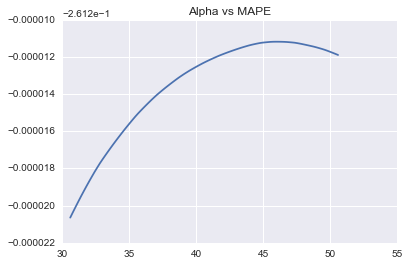

In [42]:
# ridge回归
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
alphas = np.linspace(30.6, 50.6, 100)
test_scores = []
results = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = cross_val_score(clf, X_train, y, cv=10, scoring=score)
    test_scores.append(np.mean(test_score))
    results.append([alpha, np.mean(test_score)])
plt.plot(alphas, test_scores)
plt.title("Alpha vs MAPE");

In [43]:
results = sorted(results, key=lambda x:-x[1])
results[0]

[45.953535353535358, -0.26121118919240838]

#### 模型１：Ridge(45.95) 得分0.26121118919240838

In [44]:
# Xgboost
import os
mingw_path = 'C:\Program Files\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb
regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.02,
                 max_depth=7,
                 min_child_weight=1.5,
                 n_estimators=3000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

est_score = cross_val_score(regr, X_train, y, cv=10, scoring=score,verbose=2)
print(test_score)

[CV]  ................................................................
[CV] ................................................. , total=  28.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.1s remaining:    0.0s


[CV] ................................................. , total=  30.2s
[CV]  ................................................................
[CV] ................................................. , total=  28.5s
[CV]  ................................................................
[CV] ................................................. , total=  28.4s
[CV]  ................................................................
[CV] ................................................. , total=  27.6s
[CV]  ................................................................
[CV] ................................................. , total=  27.3s
[CV]  ................................................................
[CV] ................................................. , total=  26.8s
[CV]  ................................................................
[CV] ................................................. , total=  27.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.7min finished


In [45]:
print(np.mean(est_score))

-0.290897244397


## 输出结果

In [49]:
# 训练，预测
regr.fit(X_train, y)
# test = pd.read_csv('..\..\\data_pre\\table3456_test_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
test = pd.read_csv('..\..\\data_pre\\table34567_test_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
test['avg_travel_time'] = regr.predict(X_test)
test = test.reset_index()
test = test[['intersection_id','tollgate_id','time_window','avg_travel_time']]
test.head()

,intersection_id,tollgate_id,time_window,avg_travel_time
0,A,2,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",93.444313
1,A,3,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",195.134811
2,B,1,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",149.858368
3,B,3,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",116.513329
4,C,1,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",185.206314


In [50]:
test.to_csv('..\..\\result\\xgboost_ver2.csv', index=False)